# Reading Argo data by date

Let's use, as an example, data in the *Atlantic for the 11th November 2019. 
It is pre-downloaded in the ./Data folder, but you can download it from the Coriolis GDAC [See here for instructions on how to download the data](https://euroargodev.github.io/argoonlineschool/L00_Introduction.html)

In [1]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Usefull colormaps and colorbar makers:
qcmap = mpl.colors.ListedColormap(['#000000' , '#31FC03' , '#ADFC03' , '#FCBA03' ,'#FC1C03',
                                   '#324CA8' , '#000000' , '#000000' , '#B22CC9', '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

In [3]:
dayADS = xr.open_dataset('../../Data/atlantic_ocean/2019/11/20191111_prof.nc')
dayADS

<xarray.Dataset>
Dimensions:                       (N_PROF: 184, N_PARAM: 3, N_LEVELS: 1277, N_CALIB: 3, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2020-07-11T03:31:23Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In [4]:
print(f" for this day there were {dayADS.dims['N_PROF']} profiles")

 for this day there were 184 profiles


For each one of the profiles, which are the Argo Core missions ones, this is the _Primary sampling_, so we have all the meta-information to track the float that did the observations. Let's see it for a few profiles:

In [5]:
for i1 in range(1,dayADS.dims['N_PROF'],10):
    print(f"WMO {dayADS.data_vars['PLATFORM_NUMBER'].values.astype(str)[i1]}"
          f" Data Center {dayADS.data_vars['DATA_CENTRE'].values.astype(str)[i1]}"   
          f" Data Center {dayADS.data_vars['PROJECT_NAME'].values.astype(str)[i1]}" )

WMO 6902712  Data Center IF Data Center CORIOLIS                                                        
WMO 6903698  Data Center IF Data Center Argo Finland                                                    
WMO 4902343  Data Center AO Data Center US ARGO PROJECT                                                 
WMO 4901700  Data Center AO Data Center US ARGO PROJECT                                                 
WMO 6902836  Data Center IF Data Center CORIOLIS                                                        
WMO 6902882  Data Center IF Data Center GMMC OVIDE                                                      
WMO 6903271  Data Center IF Data Center EURO-Argo RISE                                                  
WMO 6901212  Data Center BO Data Center Argo UK                                                         
WMO 6902915  Data Center IF Data Center CORIOLIS                                                        
WMO 3901108  Data Center AO Data Center US ARGO PROJECT

The correspondence for the DATA_CENTRE code and the name is in the _Reference table 4: data centres and institutions codes_ 

And we have all the geographical information in `LONGITUDE` and `LATITUDE`. First, let's read the data for the same day in the *pacific_ocean* and *indian_ocean*

In [6]:
dayPDS = xr.open_dataset('../../Data/pacific_ocean/2019/11/20191111_prof.nc')
dayIDS = xr.open_dataset('../../Data/indian_ocean/2019/11/20191111_prof.nc')

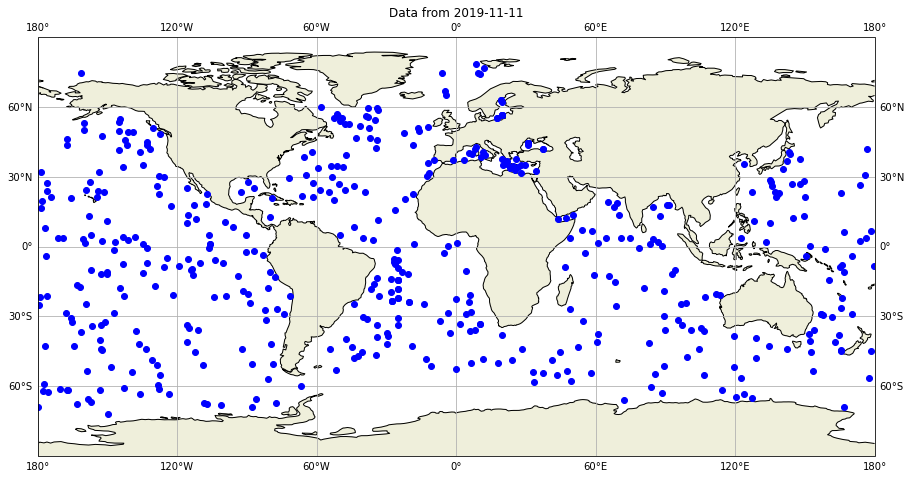

In [9]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.plot(dayADS.LONGITUDE,dayADS.LATITUDE,'ob')
ax.plot(dayPDS.LONGITUDE,dayPDS.LATITUDE,'ob')
ax.plot(dayIDS.LONGITUDE,dayIDS.LATITUDE,'ob')

ax.set_title(f"Data from {dayADS.JULD[0].values.astype('datetime64[D]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

ax.grid()

In these files there are also the core argo variables `TEMP` `PSAL` and `PRE`, we can just take a quick look at the data a the most superficial level for each profile.

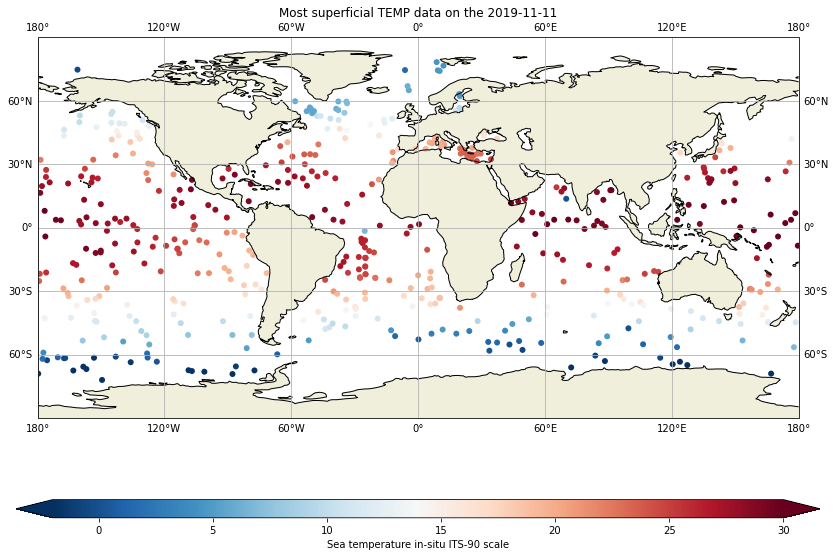

In [8]:
fig,ax = plt.subplots(figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

cs=ax.scatter(dayADS.LONGITUDE,dayADS.LATITUDE,c=dayADS.TEMP[:,1],cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')
ax.scatter(dayPDS.LONGITUDE,dayPDS.LATITUDE,c=dayPDS.TEMP[:,1],cmap="RdBu_r", vmin=-2, vmax=30, edgecolor='none')
ax.scatter(dayIDS.LONGITUDE,dayIDS.LATITUDE,c=dayIDS.TEMP[:,1],cmap="RdBu_r", vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Most superficial TEMP data on the {dayADS.JULD[0].values.astype('datetime64[D]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);


cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)

Or with a little of interpolation, the Temperature a 10 dbar:

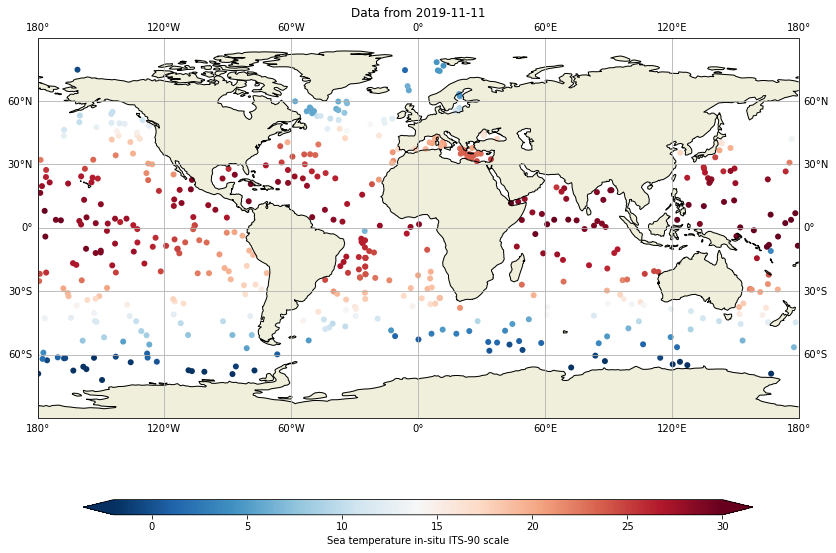

In [10]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

#For the 3 oceans
for filein in ['../../Data/atlantic_ocean/2019/11/20191111_prof.nc', 
               '../../Data/pacific_ocean/2019/11/20191111_prof.nc', 
              '../../Data/indian_ocean/2019/11/20191111_prof.nc']:
    DS=xr.open_dataset(filein)
    lon=DS.LONGITUDE.values
    lat=DS.LATITUDE.values
    tempi= np.zeros(lon.shape[0])
    tempi.fill(np.nan)
    for ip in range(0,DS.LONGITUDE.shape[0]):
        tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
    cs=ax.scatter(lon,lat,c=tempi,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Data from {DS.JULD[0].values.astype('datetime64[D]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)

To evalute the 10 dbar temperature in the last month:

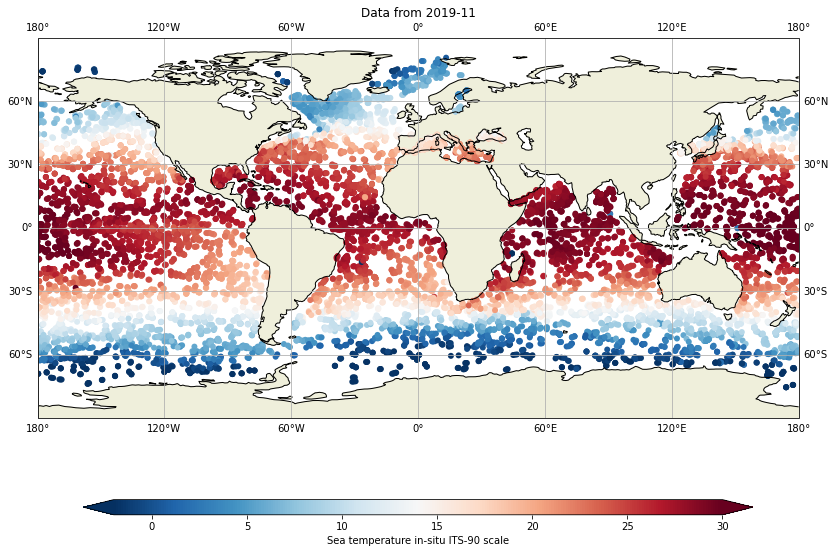

In [11]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

#For the 3 oceans
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/{basin}/2019/11/201911{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        lon=DS.LONGITUDE.values
        lat=DS.LATITUDE.values
        tempi= np.zeros(lon.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,lon.shape[0]):
            tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
        cs=ax.scatter(lon,lat,c=tempi,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Data from {DS.JULD[0].values.astype('datetime64[M]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)    

and it is possible to get the WMO of all the platforms measured during this month, together with its data acquisition center. Hence, we can download the netCDF files for each cycle if necessary :

In [14]:
WMOs=np.array([])
DACs=np.array([])
#read all the basins
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/{basin}/2019/11/201911{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        #look for the WMO and DAC for each float
        DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
        WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)

#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]

In [15]:
print(f"During november 2019 {WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],500):
    print(f"{ip} WMO {WMOs[ip]} DAC {DACs[ip]}")

During november 2019 3934 Argo floats where active:
0 WMO 1900978.0 DAC AO
500 WMO 2902294.0 DAC IN
1000 WMO 3901670.0 DAC IF
1500 WMO 4902379.0 DAC JA
2000 WMO 5903438.0 DAC AO
2500 WMO 5904784.0 DAC AO
3000 WMO 5905419.0 DAC CS
3500 WMO 6902710.0 DAC IF


In [16]:
WMOs=np.array([])
DACs=np.array([])
#read all the basins
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/{basin}/2019/11/201911{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        #look for the WMO and DAC for each float
        DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
        WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)

#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]

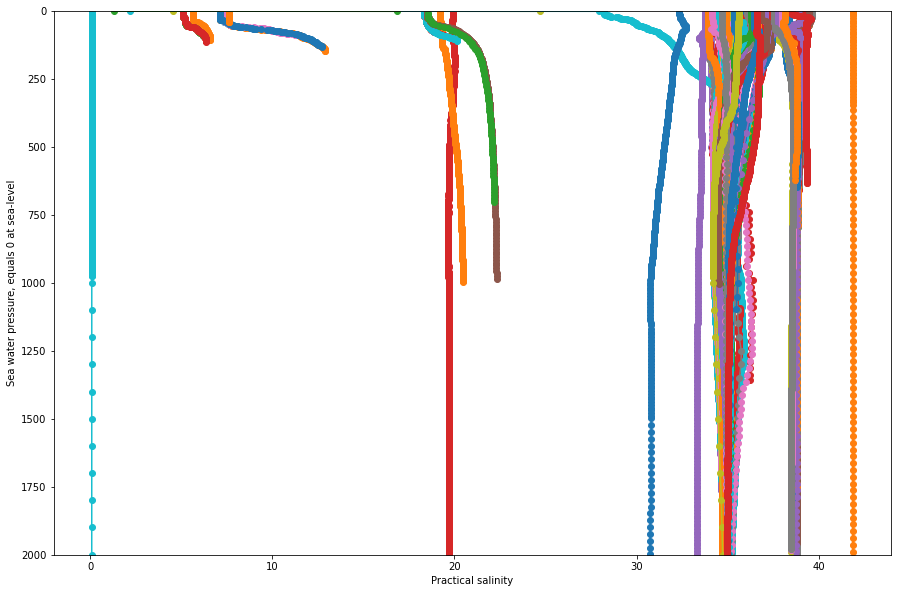

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(dayADS.PSAL.transpose(),dayADS.PRES.transpose(),'o-')
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel(f"{dayADS.PRES.long_name}");

There is some *incorrect*, or at least *suspicious* data. In the data variables of the netCDF file, we realise that there are a lot of the *_QC* variables. In the case of PSAL_QC, it changes for some profiles

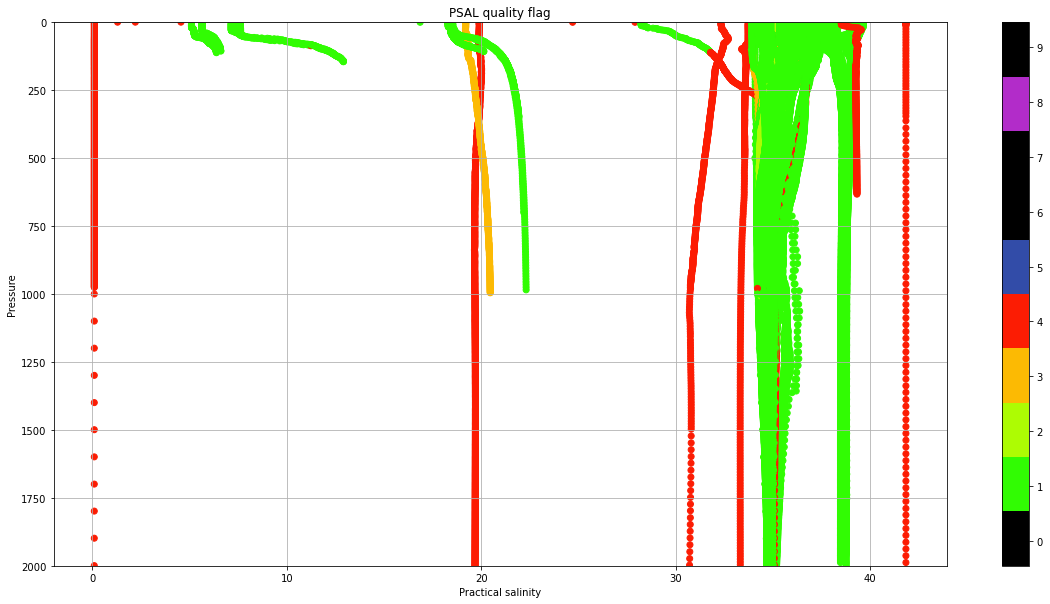

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL, dayADS.PRES, c=dayADS.PSAL_QC, vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax)
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel('Pressure')
ax.set_title(f"PSAL {dayADS.PSAL_QC.long_name}");

we will describre carefully then meaning of the QC flags in section **AQUI** [UPDATE]